## ML Supervisado: Regresiones - Tarea Individual

### Entrega 30/12 a correo marcelo.medel.v@gmail.com.

- (15%) Pregunta 1:
    - ¬øQu√© entiende del m√©todo de ajuste por m√≠nimos cuadrados ordinarios (OLS)? Investigue y desarrolle.

- (15%) Pregunta 2:
    - ¬øEn qu√© casos puede ser √∫til medir el **MAPE** como m√©trica de error? En el c√≥digo se le entrega el m√©todo para calcular la m√©trica.

- (70%) Pregunta 3:

    - Utilice los mismos datos y c√≥digos del ejemplo a continuaci√≥n, pero utilizando lo siguiente:
        * **X**: *Global_reactive_power, Voltage, Sub_metering_1, Sub_metering_2, Sub_metering_3*
        * **Y**: *Global Intensity*

    - **Preguntas**:

        * ¬øExisten valores anormales en los datos (outliers)? ¬øser√° necesario hacer alg√∫n tipo de tratamiento a estos datos?.
        * ¬øSer√° necesario escalar los datos?, en caso de utilizar alg√∫n m√©todo de escalamiento (MinMax, Standard, Robust, otro), ¬ømejora o empeora los resultados de los modelos?.
        * ¬øPara qu√© sirve la m√©trica *explained variance*? El c√°lculo se encuentra en el c√≥digo.
        * ¬øQu√© hiperpar√°metros de los modelos modific√≥ para llegar a la mejor soluci√≥n?
        * De los modelos que desarroll√≥ ¬øcu√°l es el que tiene mejor performance respecto a las m√©tricas? interprete los resultados bas√°ndose en las m√©tricas.
        * ¬øQu√© diferencias observa al mirar los coeficientes de cada modelo? Interprete cuales son las variables que mejor modelan el problema.



## Regression Example 

* Instale la √∫ltima versi√≥n disponible de scikit learn. Para este ejemplo es necesaria la versi√≥n 1.5 para poder desarrollar la m√©trica RMSE.

* El ejercicio fue tomado de Kaggle: https://www.kaggle.com/akouaorsot/power-consumption-regression-rmse-0-04

### Explicaci√≥n tomada de Kaggle.

#### Context

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

**Data Set Characteristics**:
Multivariate, Time-Series

**Associated Tasks**:
Regression, Clustering

Data Set Information:

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

#### Notes:
1.**Power Consumption** : (globalactivepower *1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Attribute Information**:
1.**date**: Date in format dd/mm/yyyy

2.**time**: time in format hh:mm:ss

3.**globalactivepower**: household global minute-averaged active power (in kilowatt)

4.**globalreactivepower**: household global minute-averaged reactive power (in kilowatt)

5.**voltage**: minute-averaged voltage (in volt)

6.**global_intensity**: household global minute-averaged current intensity (in ampere)

7.**submetering1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.**submetering2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.**submetering3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1680]:
# Instalamos las librerias necesarias
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [1681]:
import sklearn
print(sklearn.__version__)

1.6.0


In [1682]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", "{:.2f}".format)
sns.set(rc={'figure.figsize': (12,8)})


## Data Preprocessing

* Cargamos los datos
* Se reemplazan valores nulos o incorrectos con valor -1
* Se realiza cambio de tipo de datos para las variables num√©ricas
* Se realiza una imputaci√≥n de los valores -1 por la media de los valores

In [1683]:
%%time
url = 'https://drive.google.com/file/d/1G2JpK7urCs5lYcoeGMyXJxR_1FCIoTZC/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep=";", encoding="ISO-8859-1", header=0, compression='zip')
df.head()

CPU times: total: 953 ms
Wall time: 5.38 s


<timed exec>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.


Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000           17.00  
1           23.000          0.000          1.000           16.00  
2           23.000          0.000          2.000           17.00  
3           23.000          0.000          1.000           17.00  
4           15.800          0.000          1.000           17.00

In [1684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [1685]:
# Feature Modification
from sklearn.impute import SimpleImputer

df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_vars= ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_vars:
    df[i] = pd.to_numeric(df[i])
imp = SimpleImputer(missing_values=-1, strategy='mean')
df[num_vars] = imp.fit_transform(df[num_vars])

df.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                 4.22                   0.42   234.84   
1  16/12/2006  17:25:00                 5.36                   0.44   233.63   
2  16/12/2006  17:26:00                 5.37                   0.50   233.29   
3  16/12/2006  17:27:00                 5.39                   0.50   233.74   
4  16/12/2006  17:28:00                 3.67                   0.53   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             18.40            0.00            1.00           17.00  
1             23.00            0.00            1.00           16.00  
2             23.00            0.00            2.00           17.00  
3             23.00            0.00            1.00           17.00  
4             15.80            0.00            1.00           17.00

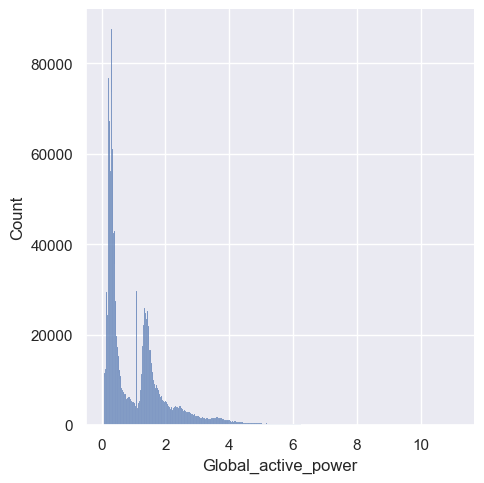

CPU times: total: 500 ms
Wall time: 1.33 s


In [1686]:
%%time
# Distribution of the target variables
sns.displot(data=df, x='Global_active_power')
plt.show()

In [1687]:
# Excluir la columna de fechas del c√°lculo de la correlaci√≥n
df_corr = df.drop(columns=['Date', 'Time'])


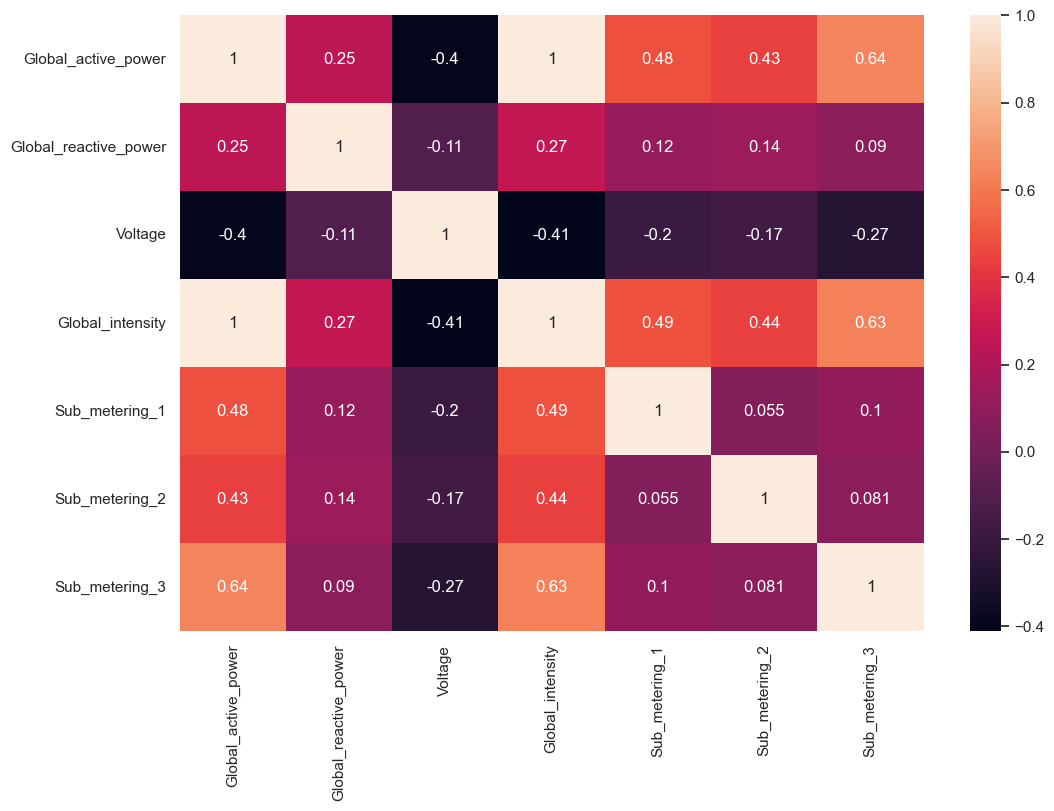

CPU times: total: 328 ms
Wall time: 887 ms


In [1688]:
%%time
corr = np.corrcoef(df_corr.corr())
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

### Train / test split process

* Para poder entrenar el modelo se dividen los datos en entrenamiento (70%) y test (30%).
* Se definen las variables independientes (**X**): *Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3*
* Se define la variable dependiente (**Y**): *Global_active_power*.

In [1689]:
from sklearn.model_selection import train_test_split

cols = ['Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = df[cols].values
Y = df['Global_intensity'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

### M√©tricas
* Para medir la performance de nuestro modelo utilizaremos las siguientes m√©tricas:
    * Mean Absolute Error (**MAE**)
    * Mean Squared Error (**RMSE**)
    * Root Mean Squared Error: (**RMSE**)
    * R2
    * Explained variance

In [1690]:
### Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score, mean_absolute_percentage_error, root_mean_squared_error

def get_metrics(Y_test,pred):
    mae = round(mean_absolute_error(Y_test,pred),3)
    mse = round(mean_squared_error(Y_test, pred), 3)
    rmse = round(root_mean_squared_error(Y_test, pred), 3)
    mape = round(mean_absolute_percentage_error(Y_test, pred), 3)
    r2 = round(r2_score(Y_test,pred), 4)
    ev = round(explained_variance_score(Y_test,pred), 4)
    return {'mae':mae,'mse':mse,'rmse':rmse, 'mape':mape,'r2':r2,'ev':ev}

### Modelos

Se desarrollan los modelos de regresi√≥n lineal, regularizaci√≥n de Ridge, regularizaci√≥n de Lasso, Elastic Net y Decision Tree.

Adicionalmente se desarrollan los modelos con Cross Validation para Elastic Net, Ridge y Lasso.

In [1691]:
### variables para guardar informaci√≥n relevante de los modelos
models = {}
coefs = {}

#### Linear Regression

In [1692]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
pred = reg_model.predict(X_test)
models['linear'] = get_metrics(Y_test,pred)
coefs['linear'] = reg_model.coef_

CPU times: total: 93.8 ms
Wall time: 297 ms


#### Ridge Regression

In [1693]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

alpha = 0.5
ridge_model = Ridge(alpha=alpha, random_state=13)
ridge_model.fit(X_train,Y_train)
pred = ridge_model.predict(X_test)
models['ridge'] = get_metrics(Y_test,pred)
coefs['ridge'] = ridge_model.coef_

CPU times: total: 15.6 ms
Wall time: 187 ms


#### Ridge Cross Validation

In [1694]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
from sklearn.linear_model import RidgeCV

alphas = [0.1, 0.5, 0.8]
ridgeCV_model = RidgeCV(alphas=alphas)
ridgeCV_model.fit(X_train,Y_train)
pred = ridgeCV_model.predict(X_test)
models['ridgeCV'] = get_metrics(Y_test,pred)
coefs['ridgeCV'] = ridgeCV_model.coef_

CPU times: total: 422 ms
Wall time: 673 ms


#### Lasso Regression

In [1695]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso

alpha = 0.5
lasso_model = Lasso(alpha=alpha, random_state=13)
lasso_model.fit(X_train, Y_train)
pred = lasso_model.predict(X_test)
models['lasso'] = get_metrics(Y_test,pred)
coefs['lasso'] = lasso_model.coef_

CPU times: total: 141 ms
Wall time: 266 ms


#### Lasso Cross Validation 

In [1696]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
from sklearn.linear_model import LassoCV

alphas = [0.1, 0.5, 0.8]
lassoCV_model = LassoCV(alphas=alphas, random_state=13)
lassoCV_model.fit(X_train, Y_train)
pred = lassoCV_model.predict(X_test)
models['lassoCV'] = get_metrics(Y_test,pred)
coefs['lassoCV'] = lassoCV_model.coef_

CPU times: total: 641 ms
Wall time: 1.39 s


## Ridge vs Lasso

* Lasso consigue seleccionar predictores, es decir convierte a cero la importancia de un feature, en cambio Ridge considera todo, dando menos peso a los menos importantes.
* Lasso tiene ventaja en escenarios donde no todos los predictores son importantes para el modelo y se desea que los **menos influyentes queden excluidos**.
* Por otro lado, **cuando existen predictores altamente correlacionados linealmente, Ridge reduce la influencia de todos ellos a la vez y de forma proporcional**, **mientras que Lasso tiende a seleccionar uno de ellos, d√°ndole todo el peso y excluyendo al resto.** En presencia de correlaciones, esta selecci√≥n var√≠a mucho con peque√±as perturbaciones (cambios en los datos de entrenamiento), por lo que, las soluciones de Lasso son muy inestables si los predictores est√°n altamente correlacionados.
* Para conseguir un equilibrio √≥ptimo entre estas dos propiedades, se puede emplear lo que se conoce como penalizaci√≥n Elastic Net, que combina ambas estrategias.

#### Elastic Net

In [1697]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic%20net#sklearn.linear_model.ElasticNet
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=13)
elastic_model.fit(X_train, Y_train)
pred = elastic_model.predict(X_test)
models['elastic'] = get_metrics(Y_test,pred)
coefs['elastic'] = elastic_model.coef_

CPU times: total: 1.64 s
Wall time: 573 ms


#### Elastic Net CV

In [1698]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV
from sklearn.linear_model import ElasticNetCV

elasticCV_model = ElasticNetCV(random_state=13)
elasticCV_model.fit(X_train, Y_train)
pred = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test,pred)
coefs['elasticCV'] = elasticCV_model.coef_

CPU times: total: 3.22 s
Wall time: 3.62 s


#### Decision Tree

In [1699]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=0)
tree_model = tree_model.fit(X_train, Y_train)
pred = tree_model.predict(X_test)
models['decision_tree'] = get_metrics(Y_test,pred)

CPU times: total: 2.56 s
Wall time: 6.61 s


### Verificaci√≥n de resultados de los modelos

In [1700]:
df_coef = pd.DataFrame.from_dict(coefs,orient='index',columns=cols).reset_index()
df_metrics = pd.DataFrame.from_dict(models)

In [1701]:
df_metrics

linear  ridge  ridgeCV  lasso  lassoCV  elastic  elasticCV  \
mae     1.52   1.52     1.52   1.56     1.56     1.57       1.55   
mse     5.05   5.05     5.05   5.32     5.29     5.33       5.21   
rmse    2.25   2.25     2.25   2.31     2.30     2.31       2.28   
mape    0.56   0.56     0.56   0.63     0.62     0.64       0.61   
r2      0.74   0.74     0.74   0.73     0.73     0.73       0.73   
ev      0.74   0.74     0.74   0.73     0.73     0.73       0.73   

      decision_tree  
mae            1.61  
mse            7.30  
rmse           2.70  
mape           0.54  
r2             0.63  
ev             0.63

In [1702]:
df_metrics_1 = df_metrics.copy()

In [1703]:
df_coef

index  Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  \
0     linear                   4.37    -0.18            0.27            0.26   
1      ridge                   4.37    -0.18            0.27            0.26   
2    ridgeCV                   4.37    -0.18            0.27            0.26   
3      lasso                   0.00    -0.15            0.27            0.26   
4    lassoCV                   0.00    -0.18            0.28            0.27   
5    elastic                   0.00    -0.14            0.27            0.26   
6  elasticCV                   0.84    -0.18            0.28            0.27   

   Sub_metering_3  
0            0.27  
1            0.27  
2            0.27  
3            0.27  
4            0.27  
5            0.27  
6            0.27

In [1704]:
importance = tree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07641
Feature: 1, Score: 0.11057
Feature: 2, Score: 0.20018
Feature: 3, Score: 0.15676
Feature: 4, Score: 0.45607


### RESOLUCI√ìN DE TAREA

- (15%) Pregunta 1:
    - ¬øQu√© entiende del m√©todo de ajuste por m√≠nimos cuadrados ordinarios (OLS)? Investigue y desarrolle.

- RESPUESTA:

El m√©todo de ajuste por minimos cuadrados ordinarios es una t√©cnica estad√≠stica utilizada para encontrar la relaci√≥n lineal que mejor ajusta un conjunto de datos. En t√©rminos simples, el objetivo del OLS es minimizar la suma de los cuadrados de las diferencias entre los valores observados (reales) y los valores predichos por el modelo. Estas diferencias se conocen como residuos. En resumen, es un m√©todo para estimar los par√°metros desconocidos en un modelo de regresi√≥n lineal. El objetivo es encontrar la l√≠nea (o hiperplano en dimensiones superiores) que mejor se ajuste a los datos minimizando la suma de las diferencias al cuadrado entre los valores observados y los valores predichos por el modelo.


En el caso de un modelo de regresi√≥n lineal simple, se asume que la relaci√≥n entre las variables puede expresarse como:

y=Œ≤0+Œ≤1x1+œµ

Para un modelo de regresi√≥n lineal m√∫ltiple, la relaci√≥n es:

y=Œ≤0+Œ≤1x1+Œ≤2x2+‚ãØ+Œ≤nxn+œµ

Donde:
y: Variable dependiente o respuesta.
x1: Variables independientes (predictoras).
Œ≤0: Intercepto del modelo (valor de ùë¶ y cuando todas las ùë• ùëñ x i  son 0).
Œ≤1: Coeficientes de las variables independientes que representan el impacto de cada ùë• ùëñ x i sobre ùë¶ y.
œµ: T√©rmino de error o residuo.

El m√©todo OLS busca minimizar la suma de los cuadrados de los residuos:

SSE=i=1‚àën(yi‚àíy^z)2

Donde:
yi: Valores observados de la variable dependiente.
y^z: Valores predichos por el modelo.

* Ejemplo y Desarrollo:
Dado que estamos usando sklearn a continuaci√≥n se muestra un ejemplo donde  la clase LinearRegression de scikit-learn aplica autom√°ticamente OLS para encontrar la pendiente e intercepto que minimizan la suma de los errores cuadr√°ticos (o residuos) entre las predicciones y los valores observados.

Este es un ajuste cl√°sico de regresi√≥n lineal, donde el modelo encuentra los coeficientes (pendiente e intercepto) que minimizan la funci√≥n de error cuadr√°tico medio (MSE), que es justamente el objetivo del m√©todo de OLS.


Coeficiente de regresi√≥n (pendiente): 2.97
Intercepto: 2.11
Error cuadr√°tico medio (MSE): 0.248
Coeficiente de determinaci√≥n (R¬≤): 0.7470


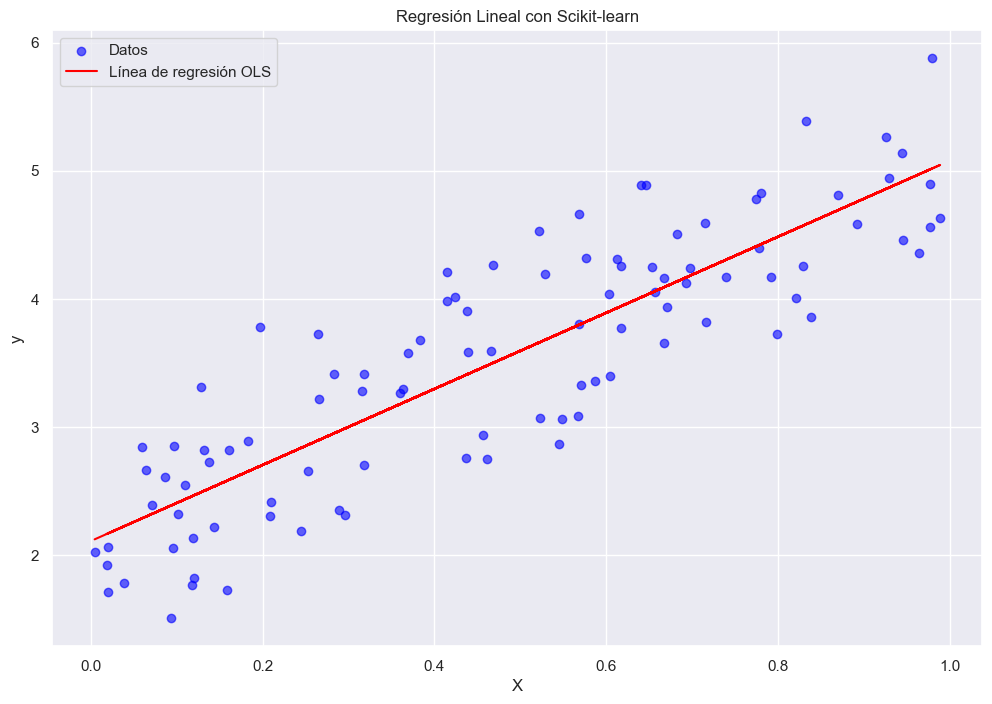

In [1705]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Conjunto de datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 1)  # Variable independiente
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.5  # Variable dependiente

# Crear y entrenar el modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X, y)

# Predecir los valores
y_pred = model.predict(X)

# Coeficientes del modelo
print(f"Coeficiente de regresi√≥n (pendiente): {model.coef_[0]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"Error cuadr√°tico medio (MSE): {mean_squared_error(y, y_pred):.3f}")
print(f"Coeficiente de determinaci√≥n (R¬≤): {r2_score(y, y_pred):.4f}")

# Graficar los datos y la l√≠nea de regresi√≥n
plt.scatter(X, y, label='Datos', color='blue', alpha=0.6)
plt.plot(X, y_pred, color='red', label='L√≠nea de regresi√≥n OLS')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regresi√≥n Lineal con Scikit-learn')
plt.show()


* Resultado:

El resultado de model.coef_ y model.intercept_ corresponde a la pendiente y el intercepto de la recta ajustada, y el valor de R¬≤ te indica qu√© tan bien se ajusta el modelo a los datos.

Para entender estos resultados desde la perspectiva del ajuste por M√≠nimos Cuadrados Ordinarios (OLS), es importante recordar que el objetivo de este metodo es encontrar los valores de los coeficientes (pendiente e intercepto) de la recta de regresi√≥n que minimicen la suma de los errores cuadr√°ticos entre las predicciones del modelo y los valores observados.

* El valor de la pendiente ùõΩ1=2.97 indica que, por cada unidad de aumento en ùëã, el modelo predice un aumento de aproximadamente 2.97 unidades en ùë¶. Este es el resultado de ajustar la l√≠nea de tal manera que el error cuadr√°tico (yi‚àíy^z)2 se minimice globalmente.

* El intercepto ùõΩ0 = 2.11 es el valor en el que la recta de regresi√≥n corta el eje ùë¶. Este valor tambin se obtiene a trav√©s de OLS, y es la estimaci√≥n de ùë¶ cuando X=0. OLS ajusta el modelo para que esta constante sea tal que, cuando el valor de ùëã es 0, la estimaci√≥n de ùë¶  sea la mas cercana posible a los valores observados.

* En el contexto de OLS, el m√©todo busca minimizar la suma de los cuadrados de estos residuos. Un MSE bajo 0.248 como del ejemplo  indica que las prediciones del modelo est√°n bastante cerca de los valores observados, aunque no son perfectas. El objetivo de OLS es encontrar los coeficientes de manera que el MSE sea lo mas bajo posible.

* El R¬≤ indica la proporci√≥n de la variabilidad de ùë¶ explicada por el modelo, lo cual tambi√©n es un reflejo de cu√°n efectivo ha sido el ajuste OLS. Un valor de R¬≤ de 0.74 significa que el 74.7% de la variabilidad en los valores de ùë¶ y se puede explicar a trav√©s del modelo lineal. El resto (25.3%) se debe a factores que no son capturados por la regresion, es decir, el error residual.

- (15%) Pregunta 2:
¬øEn qu√© casos puede ser √∫til medir el **MAPE** como m√©trica de error? En el c√≥digo se le entrega el m√©todo para calcular la m√©trica.

- RESPUESTA:

Medir el MAPE como m√©trica de error puede ser √∫til en los siguientes casos:

* 1-Interpretabilidad porcentual:

El MAPE es √∫til cuando queremos expresar el error en porcentajes, lo que facilita la comprensi√≥n, especialmente para audiencias no t√©cnicas. Por ejemplo, en este ejercicio, si se eval√∫a la variable Global Intensity (en amperios), un error promedio de x %  resulta mas facil de interpretar que un valor absoluto en amperios. Esto permite que los resultados del modelo sean m√°s accesibles para quienes no est√°n familiarizados con las unidades t√©cnicas.

* 2-Comparaci√≥n entre diferentes conjuntos de datos o modelos:

Al ser una metrica adimensional, es especialmente √∫til para comparar el rendimiento de diferentes modelos o conjuntos de datos. En este caso, si se aplican modelos con la misma entrada pero diferentes variables objetivo (por ejemplo, Global Intensity y Power Consunption), el MAPE permite una comparaci√≥n justa, siempre y cuando los valores reales sean positivos y suficientemente grandes.

* 3-Evaluaci√≥n en problemas donde los errores relativos son cr√≠ticos:

En situaciones donde los errores relativos son m√°s importantes que los absolutos, el MAPE es una m√©trica clave. Por ejemplo, al predecir el consumo energ√©tico (Power Consumption), un error porcentual tiene mayor relevancia para la planificaci√≥n que un error absoluto, ya que las decisiones estrat√©gicas suelen depender de la precisi√≥n relativa en lugar de valores absolutos.

* 4-Toma de decisiones basada en precisi√≥n relativa:

En casos donde las decisiones dependen de la relaci√≥n entre la predicci√≥n y los valores reales. Por ejemplo, en este ejercicio, al analizar variables como Global Active Power, un error porcentual brinda informaci√≥n directa sobre el impacto relativo en el consumo energ√©tico, lo que es crucial para an√°lisis financieros o de costos.

- (70%) Pregunta 3:

    - Utilice los mismos datos y c√≥digos del ejemplo a continuaci√≥n, pero utilizando lo siguiente:
        * **X**: *Global_reactive_power, Voltage, Sub_metering_1, Sub_metering_2, Sub_metering_3*
        * **Y**: *Global Intensity*

    - **Preguntas**:

        * ¬øExisten valores anormales en los datos (outliers)? ¬øser√° necesario hacer alg√∫n tipo de tratamiento a estos datos?.
        * ¬øSer√° necesario escalar los datos?, en caso de utilizar alg√∫n m√©todo de escalamiento (MinMax, Standard, Robust, otro), ¬ømejora o empeora los resultados de los modelos?.
        * ¬øPara qu√© sirve la m√©trica *explained variance*? El c√°lculo se encuentra en el c√≥digo.
        * ¬øQu√© hiperpar√°metros de los modelos modific√≥ para llegar a la mejor soluci√≥n?
        * De los modelos que desarroll√≥ ¬øcu√°l es el que tiene mejor performance respecto a las m√©tricas? interprete los resultados bas√°ndose en las m√©tricas.
        * ¬øQu√© diferencias observa al mirar los coeficientes de cada modelo? Interprete cuales son las variables que mejor modelan el problema.

* ¬øExisten valores anormales en los datos (outliers)? ¬øser√° necesario hacer alg√∫n tipo de tratamiento a estos datos?.

# RESPUESTA:

* Identificaci√≥n de Outliers: Lo primero que tenemos que hacer es evaluar si el conjunto de datos, tanto las variables predictoras como la variable de salida (dependiente), contienen outliers. Para ello, utilizamos gr√°ficos como los boxplots para detectar valores que se encuentran fuera del rango intercuart√≠lico (es decir, fuera de los l√≠mites definidos por Q1 - 1.5IQR y Q3 + 1.5IQR). Adem√°s, los histogramas pueden proporcionarnos una visualizaci√≥n adicional para observar la distribuci√≥n de las variables y la presencia de valores extremos.

* Evaluaci√≥n del dataset: Como primer paso, es importante tambi√©n verificar que no haya valores nulos en las variables, lo cual se trata generalmente al inicio del proceso (como se realiz√≥ en el notebook).

* Tratamiento de Outliers: La necesidad de tratar los outliers depende del impacto que tengan sobre el modelo. Si los valores extremos afectan la precisi√≥n o el ajuste del modelo, por ejemplo, , la regresi√≥n lineal es sensible a los outliers, por lo que debemos tratar los valores an√≥malos antes de entrenar el modelo, sin embargo, Ridge regression es m√°s robusta que la regresi√≥n lineal est√°ndar, ya que utiliza regularizaci√≥n, lo que reduce la magnitud de los coeficientes. Aunque no es tan sensible a los outliers como la regresi√≥n lineal simple.

* Aunque Ridge y Elastic Net son menos sensibles a los outliers gracias a la regularizaci√≥n, lo mas recomendable seria tratarlos antes de entrenar los modelos (especialmente para Lasso y regresion lineal). Algunas de las t√©cnicas que podemos aplicar son:

* 1.Eliminaci√≥n de Outliers: Utilizando los l√≠mites definidos por el IQR o puntaje Z, podemos eliminar los valores que est√©n fuera del rango aceptable.
* 2.Imputaci√≥n de Outliers: En lugar de eliminar los valores, podemos sustituir los outliers por la mediana o el percentil m√°s cercano dentro del rango aceptable. Esto es √∫til para preservar la mayor cantidad de datos posible sin perder informaci√≥n relevante.
* 3-Tratamiento Individualizado: En algunos casos, puede ser √∫til investigar cada caso extremo manualmente para determinar si debe eliminarse o ajustarse seg√∫n el contexto. Esto puede implicar la revisi√≥n de casos espec√≠ficos en el dataset, especialmente si no se tiene informaci√≥n t√©cnica detallada.
* 4-C√°lculo del Puntaje Z: Se calcula el puntaje Z para cada dato. Si el puntaje Z es mayor a 3 o menor a -3, se considera un outlier. Este m√©todo estad√≠stico es √∫til para identificar valores extremos que podr√≠an estar afectando el modelo.
* 5-Transformaci√≥n Logar√≠tmica o Ra√≠z Cuadrada: Si las variables tienen una distribuci√≥n sesgada, aplicar una transformaci√≥n logar√≠tmica o una ra√≠z cuadrada puede reducir el impacto de los outliers al "comprimir" los valores extremos.
* 6-Clipping o Winsorizing: Esta t√©cnica implica recortar los valores extremos, asign√°ndoles un valor m√°ximo o m√≠nimo razonable para evitar que influencien demasiado el modelo, manteniendo la distribuci√≥n general sin perder demasiada variabilidad.

* Consideraciones T√©cnicas: Aunque los outliers deben tratarse utilizando m√©todos estad√≠sticos, como los mencionados anteriormente, es importante tener en cuenta el conocimiento t√©cnico del dominio. En este caso, aunque los outliers pueden ser detectados con m√©todos estad√≠sticos, no siempre son errores. Pueden ser eventos leg√≠timos (por ejemplo, un pico de consumo el√©ctrico durante un evento inusual). Por lo tanto, siempre es recomendable consultar con expertos o tener un conocimiento del contexto para validar si esos outliers son realmente an√≥malos o si representan eventos significativos en el dataset.



# An√°lisis de Datos y Tratamiento de outliers

In [1706]:
df.describe()

Global_active_power  Global_reactive_power    Voltage  \
count           2075259.00             2075259.00 2075259.00   
mean                  1.09                   0.12     240.84   
std                   1.05                   0.11       3.22   
min                   0.08                   0.00     223.20   
25%                   0.31                   0.05     239.02   
50%                   0.63                   0.10     240.96   
75%                   1.52                   0.19     242.86   
max                  11.12                   1.39     254.15   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count        2075259.00      2075259.00      2075259.00      2075259.00  
mean               4.63            1.12            1.30            6.46  
std                4.42            6.11            5.79            8.38  
min                0.20            0.00            0.00            0.00  
25%                1.40            0.00            0.00            0.00  
50%                2.80            0.00            0.00            1.00  
75%                6.40            0.00            1.00           17.00  
max               48.40           88.00           80.00           31.00

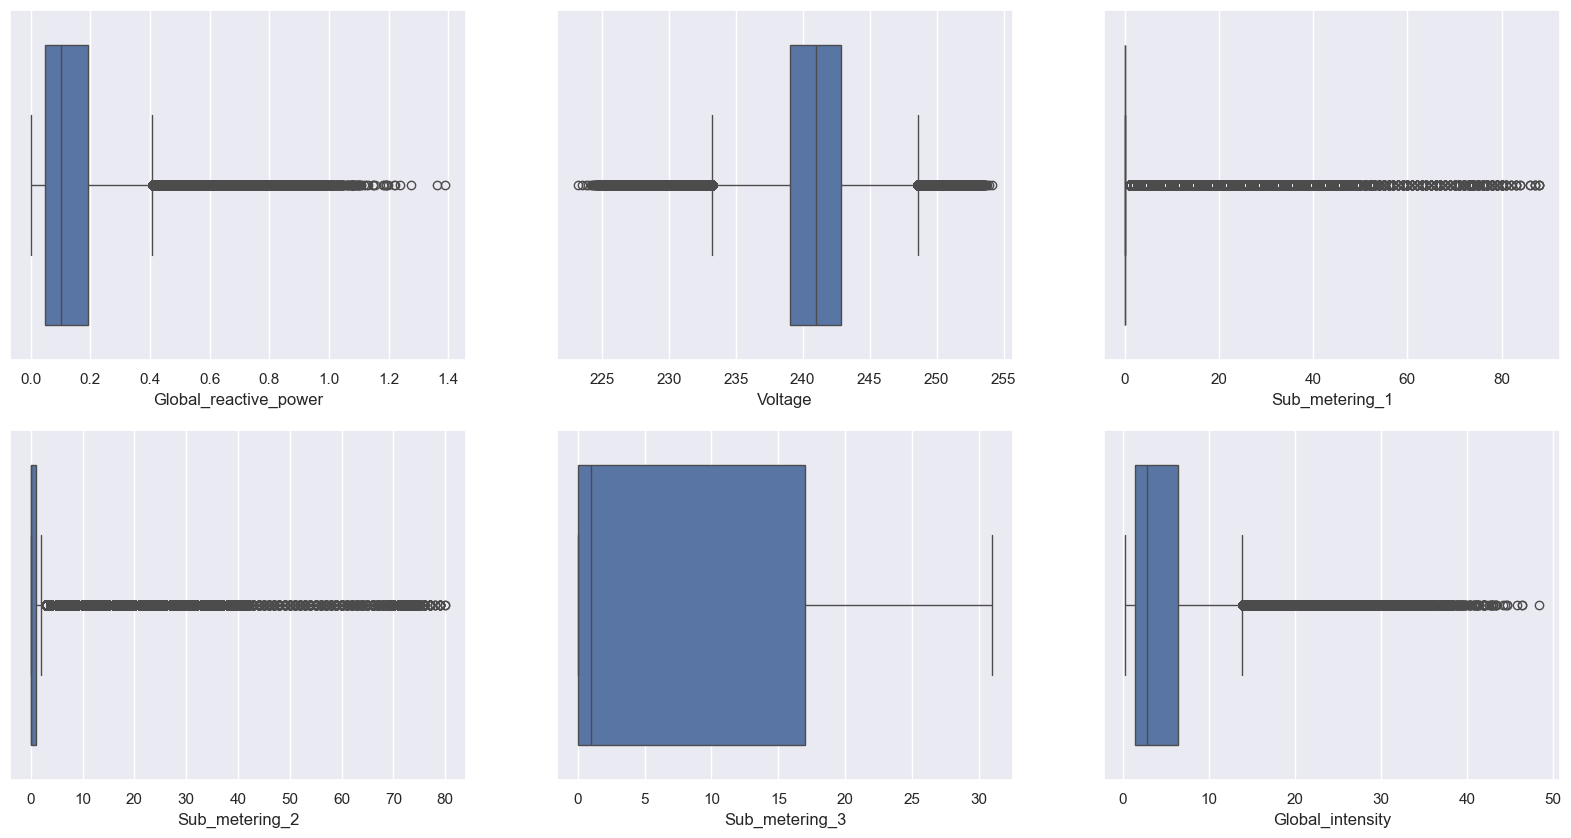

In [1707]:
# comprueba si existe outliers en las variables, Global_reactive_power, Voltage, Sub_metering_1, Sub_metering_2, Sub_metering_3 y Global Intensity
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(data=df, x='Global_reactive_power', ax=axs[0, 0])
sns.boxplot(data=df, x='Voltage', ax=axs[0, 1])
sns.boxplot(data=df, x='Sub_metering_1', ax=axs[0, 2])
sns.boxplot(data=df, x='Sub_metering_2', ax=axs[1, 0])
sns.boxplot(data=df, x='Sub_metering_3', ax=axs[1, 1])
sns.boxplot(data=df, x='Global_intensity', ax=axs[1, 2])
plt.show()

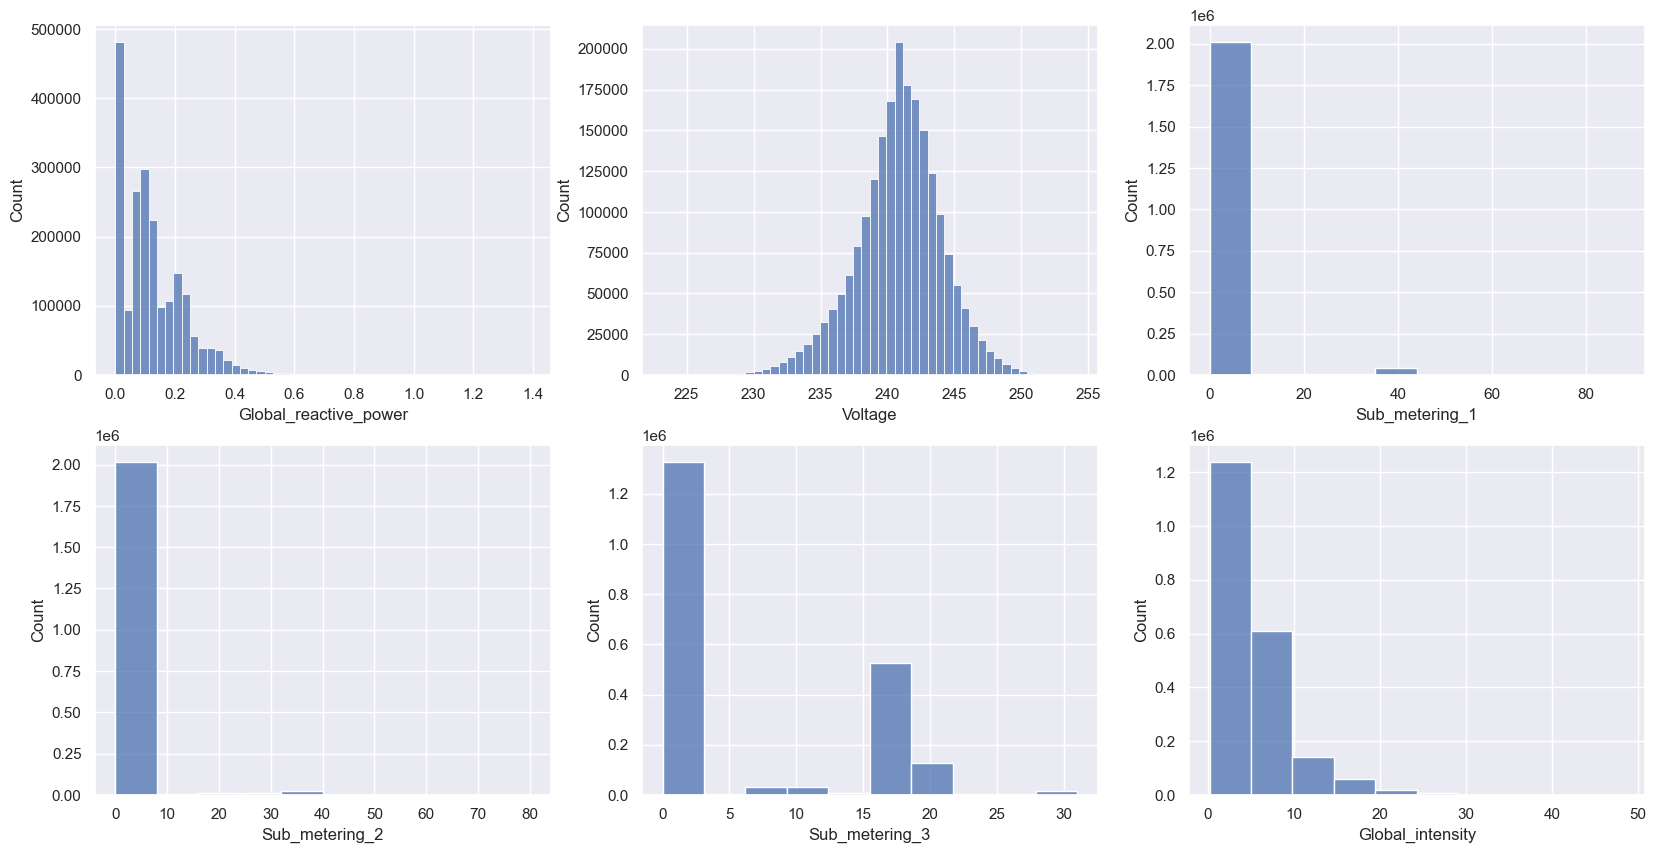

In [1708]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(data=df, x='Global_reactive_power', bins=50, ax=axs[0, 0])
sns.histplot(data=df, x='Voltage',bins=50, ax=axs[0, 1])
sns.histplot(data=df, x='Sub_metering_1', bins=10, ax=axs[0, 2])
sns.histplot(data=df, x='Sub_metering_2', bins=10, ax=axs[1, 0])
sns.histplot(data=df, x='Sub_metering_3', bins=10, ax=axs[1, 1])
sns.histplot(data=df, x='Global_intensity', bins=10, ax=axs[1, 2])

plt.show()

In [1709]:
# Calcular IQC Max y Minimo para las variables Global_reactive_power, Voltage, Sub_metering_1, Sub_metering_2, Sub_metering_3 y Global Intensity
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = max(0, Q1 - 1.5 * IQR)  # Asegura que el m√≠nimo no sea menor que 0
    max_value = Q3 + 1.5 * IQR
    return min_value, max_value


In [1710]:
min_value, max_value = iqr_outliers(df, 'Sub_metering_1')
print(f' Min: {min_value}, Max: {max_value}')

min_value, max_value = iqr_outliers(df, 'Sub_metering_2')
print(f' Min: {min_value}, Max: {max_value}')

min_value, max_value = iqr_outliers(df, 'Sub_metering_3')
print(f' Min: {min_value}, Max: {max_value}')

 Min: 0, Max: 0.0
 Min: 0, Max: 2.5
 Min: 0, Max: 42.5


 * Como podemos observar en la columna "Sub_metering_1" en este caso no tendriamos tratamiento efectivo de outliers si el rango intercuartil (IQR) resulta en l√≠mites de min_value y max_value iguales a 0.0. Esto ocurre porque los datos est√°n altamente sesgados hacia ceros, y el c√°lculo de IQR (basado en los percentiles 25% y 75%) no captura valores significativos que se puedan considerar como "at√≠picos".


* Sub_metering_1:

Percentiles (25%, 50%, 75%): Todos est√°n en 0.0, indicando que la mayor√≠a de los valores son ceros.
Esto resulta en un IQR = 0, lo que hace que el tratamiento de outliers basado en IQR no funcione.


* Dado lo anterior consideramos solo limpiar el dataframe de los valores outliers los que no estan sesgados por 0 como ,Sub_metering_2, Sub_metering_3 Global_reactive_power,Voltage y Global_intensity

In [1711]:
df2 = df.copy()

In [1712]:
min_value, max_value = iqr_outliers(df2, 'Sub_metering_2')
print(f' Min: {min_value}, Max: {max_value}')

 Min: 0, Max: 2.5


In [1713]:
# Actualiza el df2 para filtrarlo eliminado los valores at√≠picos min_value y max_value
df2 = df2[(df2['Sub_metering_2'] >= min_value) & (df2['Sub_metering_2'] <= max_value)]

In [1714]:
min_value, max_value = iqr_outliers(df2, 'Sub_metering_3')
print(f' Min: {min_value}, Max: {max_value}')

 Min: 0, Max: 42.5


In [1715]:
# Actualiza el df2 para filtrarlo eliminado los valores at√≠picos min_value y max_value
df2 = df2[(df2['Sub_metering_3'] >= min_value) & (df2['Sub_metering_3'] <= max_value)]

In [1716]:
min_value, max_value = iqr_outliers(df2, 'Global_reactive_power')
print(f' Min: {min_value}, Max: {max_value}')

 Min: 0, Max: 0.398


In [1717]:
# Actualiza el df2 para filtrarlo eliminado los valores at√≠picos min_value y max_value
df2 = df2[(df2['Global_reactive_power'] >= min_value) & (df2['Global_reactive_power'] <= max_value)]

In [1718]:
min_value, max_value = iqr_outliers(df2, 'Voltage')
print(f' Min: {min_value}, Max: {max_value}')

 Min: 233.565, Max: 248.565


In [1719]:
# Actualiza el df2 para filtrarlo eliminado los valores at√≠picos min_value y max_value
df2 = df2[(df2['Voltage'] >= min_value) & (df2['Voltage'] <= max_value)]

In [1720]:
min_value, max_value = iqr_outliers(df2, 'Global_intensity')
print(f' Min: {min_value}, Max: {max_value}')

 Min: 0, Max: 12.899999999999999


In [1721]:
#Actualiza el df2 para filtrarlo eliminado los valores at√≠picos min_value y max_value
df2 = df2[(df2['Global_intensity'] >= min_value) & (df2['Global_intensity'] <= max_value)]

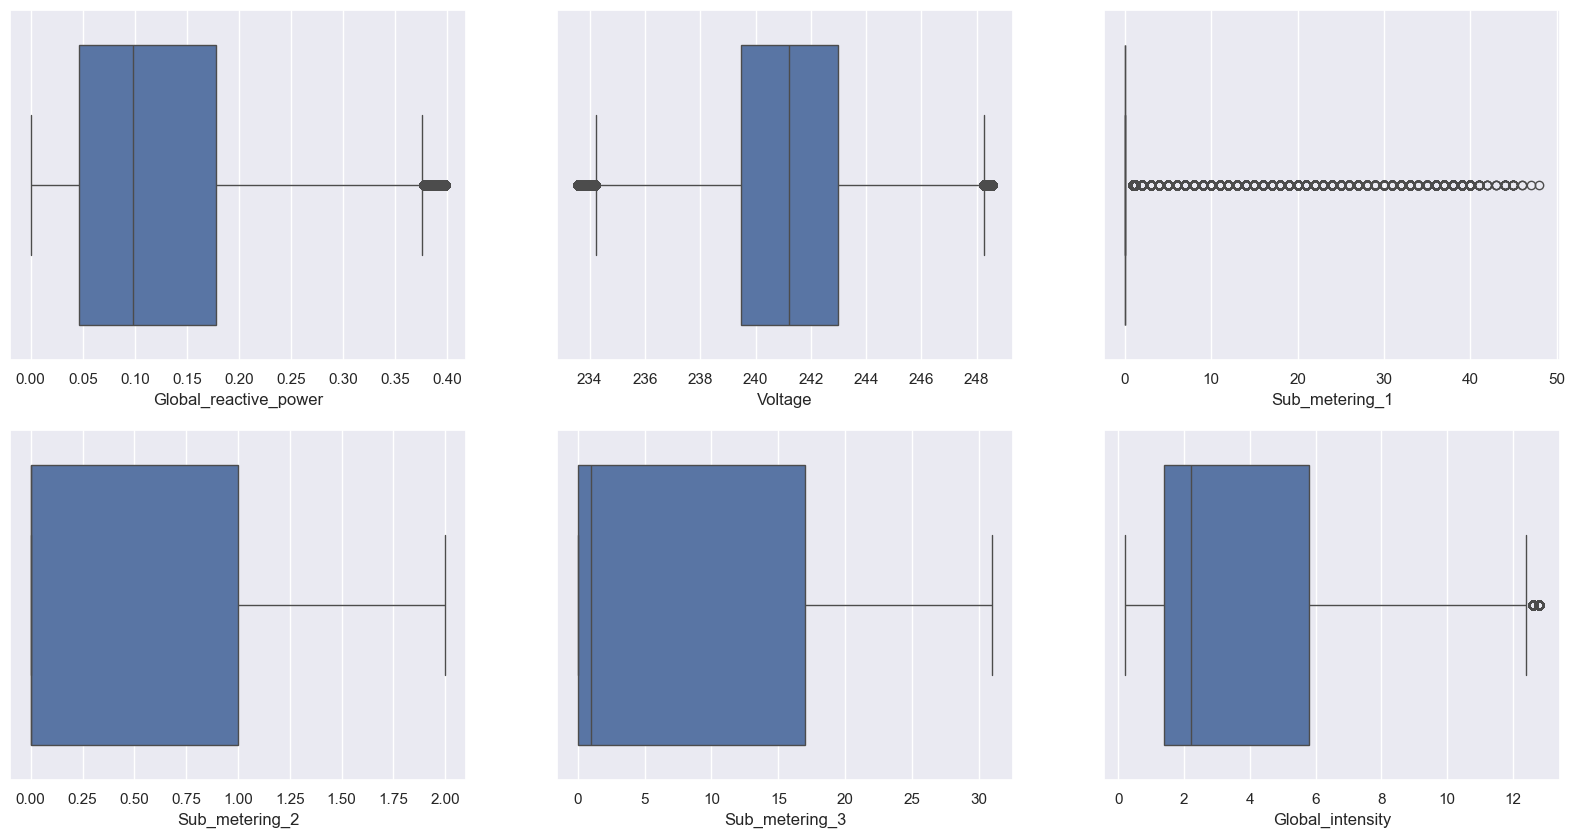

In [1722]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(data=df2, x='Global_reactive_power', ax=axs[0, 0])
sns.boxplot(data=df2, x='Voltage', ax=axs[0, 1])
sns.boxplot(data=df2, x='Sub_metering_1', ax=axs[0, 2])
sns.boxplot(data=df2, x='Sub_metering_2', ax=axs[1, 0])
sns.boxplot(data=df2, x='Sub_metering_3', ax=axs[1, 1])
sns.boxplot(data=df2, x='Global_intensity', ax=axs[1, 2])
plt.show()

In [1723]:
df2.describe()

Global_active_power  Global_reactive_power    Voltage  \
count           1839826.00             1839826.00 1839826.00   
mean                  0.87                   0.11     241.19   
std                   0.71                   0.09       2.77   
min                   0.08                   0.00     233.57   
25%                   0.30                   0.05     239.48   
50%                   0.48                   0.10     241.20   
75%                   1.41                   0.18     242.99   
max                   3.19                   0.40     248.56   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count        1839826.00      1839826.00      1839826.00      1839826.00  
mean               3.69            0.28            0.36            5.84  
std                2.95            2.68            0.62            8.16  
min                0.20            0.00            0.00            0.00  
25%                1.40            0.00            0.00            0.00  
50%                2.20            0.00            0.00            1.00  
75%                5.80            0.00            1.00           17.00  
max               12.80           48.00            2.00           31.00

In [1724]:
df2_corr = df2.drop(columns=['Date', 'Time'])

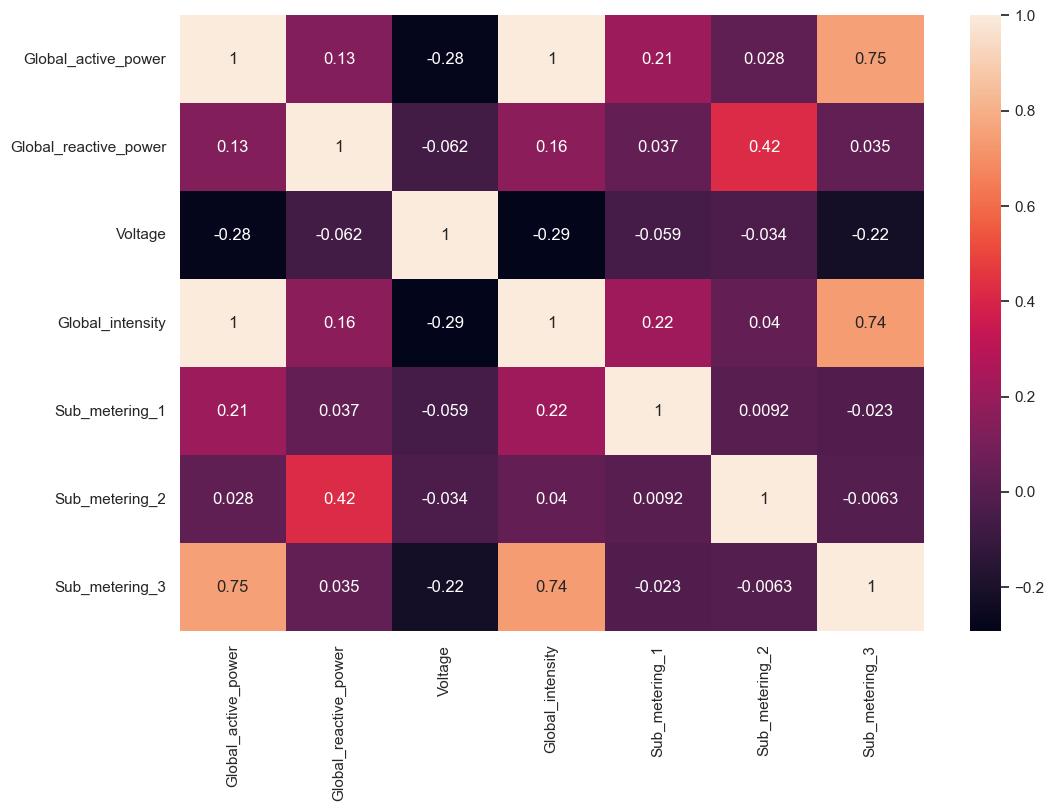

In [1725]:
# crea una matriz de correlacion usando el df2
corr = np.corrcoef(df2_corr.corr())
sns.heatmap(df2_corr.corr(), annot=True)
plt.show()

# EVALUAMOS NUEVAMENTE LOS MODELOS USANDO DF2 SIN LOS VALORES ATIPICOS

# Train Test/Split

In [1726]:
from sklearn.model_selection import train_test_split

cols = ['Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = df2[cols].values
Y = df2['Global_intensity'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

In [1727]:
### variables para guardar informaci√≥n relevante de los modelos
models = {}
coefs = {}

#### Linear Regression

In [1728]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
pred = reg_model.predict(X_test)
models['linear'] = get_metrics(Y_test,pred)
coefs['linear'] = reg_model.coef_

CPU times: total: 125 ms
Wall time: 250 ms


#### Ridge Regression

In [1729]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

alpha = 0.5
ridge_model = Ridge(alpha=alpha, random_state=13)
ridge_model.fit(X_train,Y_train)
pred = ridge_model.predict(X_test)
models['ridge'] = get_metrics(Y_test,pred)
coefs['ridge'] = ridge_model.coef_

CPU times: total: 125 ms
Wall time: 164 ms


#### Ridge Cross Validation

In [1730]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
from sklearn.linear_model import RidgeCV

alphas = [0.1, 0.5, 0.8]
ridgeCV_model = RidgeCV(alphas=alphas)
ridgeCV_model.fit(X_train,Y_train)
pred = ridgeCV_model.predict(X_test)
models['ridgeCV'] = get_metrics(Y_test,pred)
coefs['ridgeCV'] = ridgeCV_model.coef_

CPU times: total: 406 ms
Wall time: 637 ms


#### Lasso Regression

In [1731]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso

alpha = 0.5
lasso_model = Lasso(alpha=alpha, random_state=13)
lasso_model.fit(X_train, Y_train)
pred = lasso_model.predict(X_test)
models['lasso'] = get_metrics(Y_test,pred)
coefs['lasso'] = lasso_model.coef_

CPU times: total: 312 ms
Wall time: 279 ms


#### Lasso Cross Validation 

In [1732]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
from sklearn.linear_model import LassoCV

alphas = [0.1, 0.5, 0.8]
lassoCV_model = LassoCV(alphas=alphas, random_state=13)
lassoCV_model.fit(X_train, Y_train)
pred = lassoCV_model.predict(X_test)
models['lassoCV'] = get_metrics(Y_test,pred)
coefs['lassoCV'] = lassoCV_model.coef_

CPU times: total: 359 ms
Wall time: 999 ms


#### Elastic Net

In [1733]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic%20net#sklearn.linear_model.ElasticNet
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=13)
elastic_model.fit(X_train, Y_train)
pred = elastic_model.predict(X_test)
models['elastic'] = get_metrics(Y_test,pred)
coefs['elastic'] = elastic_model.coef_

CPU times: total: 312 ms
Wall time: 357 ms


#### Elastic Net CV

In [1734]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV
from sklearn.linear_model import ElasticNetCV

elasticCV_model = ElasticNetCV(random_state=13)
elasticCV_model.fit(X_train, Y_train)
pred = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test,pred)
coefs['elasticCV'] = elasticCV_model.coef_

CPU times: total: 1.08 s
Wall time: 2.53 s


#### Decision Tree

In [1735]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=0)
tree_model = tree_model.fit(X_train, Y_train)
pred = tree_model.predict(X_test)
models['decision_tree'] = get_metrics(Y_test,pred)

CPU times: total: 2.02 s
Wall time: 5.2 s


### Verificaci√≥n de resultados de los modelos 2

In [1736]:
df_coef = pd.DataFrame.from_dict(coefs,orient='index',columns=cols).reset_index()
df_metrics = pd.DataFrame.from_dict(models)

In [1737]:
df_metrics

linear  ridge  ridgeCV  lasso  lassoCV  elastic  elasticCV  \
mae     1.23   1.23     1.23   1.29     1.26     1.29       1.25   
mse     3.18   3.18     3.18   3.37     3.31     3.38       3.27   
rmse    1.78   1.78     1.78   1.83     1.82     1.84       1.81   
mape    0.55   0.55     0.55   0.63     0.61     0.63       0.59   
r2      0.63   0.63     0.63   0.61     0.62     0.61       0.62   
ev      0.63   0.63     0.63   0.61     0.62     0.61       0.62   

      decision_tree  
mae            1.31  
mse            4.47  
rmse           2.11  
mape           0.53  
r2             0.48  
ev             0.48

In [1738]:
df_metrics_2 = df_metrics.copy()

In [1739]:
df_coef

index  Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  \
0     linear                   3.90    -0.12            0.25           -0.07   
1      ridge                   3.90    -0.12            0.25           -0.07   
2    ridgeCV                   3.90    -0.12            0.25           -0.07   
3      lasso                   0.00    -0.07            0.19            0.00   
4    lassoCV                   0.00    -0.11            0.24            0.00   
5    elastic                   0.00    -0.06            0.17            0.00   
6  elasticCV                   0.48    -0.12            0.25            0.10   

   Sub_metering_3  
0            0.26  
1            0.26  
2            0.26  
3            0.26  
4            0.26  
5            0.25  
6            0.26

In [1740]:
importance = tree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08985
Feature: 1, Score: 0.14749
Feature: 2, Score: 0.07284
Feature: 3, Score: 0.01381
Feature: 4, Score: 0.67602



Los resultados muestran un contraste significativo entre los modelos entrenados con el dataframe1 sin tratamiento de outliers y el dataframe2 con tratamiento de outliers. Vamos a analizarlos en detalle.

1. Sin Tratamiento de Outliers
M√©tricas (MAE, MSE, RMSE, MAPE): Los errores son extremadamente bajos, lo que indica un ajuste casi perfecto.
R2 y EV: Ambas m√©tricas tienen valores cercanos o iguales a 1.0, lo que sugiere que el modelo explica casi toda la varianza de los datos.
Interpretaci√≥n:
El desempe√±o casi perfecto puede indicar que los modelos podriam estar sobreajustados debido a la influencia de los outliers, especialmente si estos est√°n presentes tanto en X como en ùë¶

Esto es particularmente relevante en regresi√≥n lineal y sus variantes (Ridge, Lasso, Elastic Net), que son sensibles a valores extremos.

Observaciones:
El √°rbol de decisi√≥n tambi√©n presenta un rendimiento excelente, pero los √°rboles son m√°s robustos a outliers, por lo que su desempe√±o podr√≠a reflejar los patrones generales de los datos.

2. Con Tratamiento de Outliers

M√©tricas de Error (MAE, MSE, RMSE, MAPE): Los errores aumentan significativamente.
R2 y EV: Aunque todav√≠a altos, los valores disminuyen (alrededor de 0.72 para la mayor√≠a de los modelos, y 0.59 para el √°rbol de decisi√≥n).
Interpretaci√≥n:
El tratamiento de outliers parece haber reducido el ajuste excesivo de los modelos, especialmente en las regresiones lineales.
El rendimiento m√°s modesto sugiere que los modelos ahora est√°n ajust√°ndose a un conjunto de datos m√°s limpio y representativo, eliminando el impacto desproporcionado de valores extremos.

Observaciones:
La disminuci√≥n en el desempe√±o del √°rbol de decisi√≥n (R2 = 0.48, EV = 0.48) puede indicar que los valores extremos ten√≠an un impacto significativo en su capacidad de predicci√≥n.


* Aunque los modelos sin tratamiento de outliers muestran m√©tricas bien ajustada casi perfectas, podria ser que estan sobreajustados. Los modelos entrenados con el dataframe tratado ofrecen una representaci√≥n m√°s realista y generalizable de los datos.

* ¬øSer√° necesario escalar los datos?, en caso de utilizar alg√∫n m√©todo de escalamiento (MinMax, Standard, Robust, otro), ¬ømejora o empeora los resultados de los modelos?.

* RESPUESTA: 

El escalado de los datos es una t√©cnica que se utiliza principalmente en modelos que son sensibles a las magnitudes y unidades de las variables predictoras.nLos modelos lineales y sus variantes como Ridge, Lasso y Elastic Net suelen beneficiarse del escalado de los datos porque estos modelos son sensibles a la magnitud de las caracter√≠sticas. Las variables con escalas grandes pueden dominar el modelo, lo que afecta la capacidad de los coeficientes de regularizar o ajustarse correctamente. Por lo que podria ser un benificio para el modelo que estamos realizando.

* Para responder a la pregunta vamos a utilizar alguno de los metodos de escalados propuestos, en este caso usaremos El MinMaxScaler escala las caracter√≠sticas para que est√©n dentro de un rango espec√≠fico, generalmente entre 0 y 1. Esto es √∫til cuando tus caracter√≠sticas no siguen una distribuci√≥n normal, pero deseas que est√©n dentro de un rango conocido.

In [1741]:
df2.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
30  16/12/2006  17:54:00                 2.72                   0.00   235.06   
35  16/12/2006  17:59:00                 2.47                   0.06   236.94   
36  16/12/2006  18:00:00                 2.79                   0.18   237.52   
37  16/12/2006  18:01:00                 2.62                   0.14   238.20   
38  16/12/2006  18:02:00                 2.77                   0.12   238.28   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
30             11.60            0.00            0.00           17.00  
35             10.40            0.00            0.00           17.00  
36             11.80            0.00            0.00           18.00  
37             11.00            0.00            0.00           17.00  
38             11.60            0.00            0.00           17.00

In [1743]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado MinMax a las variables predictoras
X_scaled = scaler.fit_transform(X)

# Convertir el resultado escalado en un DataFrame con los mismos nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=['Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])

# Asegurarnos de que el √≠ndice se mantenga igual en X_scaled_df
X_scaled_df.index = df2.index

# Unir la variable objetivo 'Global_intensity' sin escalar
df_scaled = pd.concat([X_scaled_df, df2[['Global_intensity']]], axis=1)

# Ver el dataframe escalado
df_scaled.head()


Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  \
30                   0.00     0.10            0.00            0.00   
35                   0.15     0.22            0.00            0.00   
36                   0.45     0.26            0.00            0.00   
37                   0.36     0.31            0.00            0.00   
38                   0.30     0.31            0.00            0.00   

    Sub_metering_3  Global_intensity  
30            0.55             11.60  
35            0.55             10.40  
36            0.58             11.80  
37            0.55             11.00  
38            0.55             11.60

In [1744]:
from sklearn.model_selection import train_test_split

cols = ['Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = df_scaled[cols].values
Y = df_scaled['Global_intensity'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

In [1745]:
### variables para guardar informaci√≥n relevante de los modelos
models = {}
coefs = {}

#### Linear Regression

In [1746]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
pred = reg_model.predict(X_test)
models['linear'] = get_metrics(Y_test,pred)
coefs['linear'] = reg_model.coef_

CPU times: total: 156 ms
Wall time: 237 ms


#### Ridge Regression

In [1779]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

alpha = 0.5  ## alpha = 0.5
ridge_model = Ridge(alpha=alpha, random_state=13)
ridge_model.fit(X_train,Y_train)
pred = ridge_model.predict(X_test)
models['ridge'] = get_metrics(Y_test,pred)
coefs['ridge'] = ridge_model.coef_

models['ridge'] 

CPU times: total: 62.5 ms
Wall time: 165 ms


{'mae': 1.227,
 'mse': 3.176,
 'rmse': 1.782,
 'mape': 0.548,
 'r2': 0.6334,
 'ev': 0.6334}

#### Ridge Cross Validation

In [1748]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
from sklearn.linear_model import RidgeCV

alphas = [0.1, 0.5, 0.8]
ridgeCV_model = RidgeCV(alphas=alphas)
ridgeCV_model.fit(X_train,Y_train)
pred = ridgeCV_model.predict(X_test)
models['ridgeCV'] = get_metrics(Y_test,pred)
coefs['ridgeCV'] = ridgeCV_model.coef_

CPU times: total: 234 ms
Wall time: 547 ms


#### Lasso Regression

In [1783]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso


lasso_model = Lasso( random_state=13, alpha= 0.1, fit_intercept= False, max_iter=1000, tol= 0.001)
lasso_model.fit(X_train, Y_train)
pred = lasso_model.predict(X_test)
models['lasso'] = get_metrics(Y_test,pred)
coefs['lasso'] = lasso_model.coef_

models['lasso']

CPU times: total: 281 ms
Wall time: 251 ms


{'mae': 1.263,
 'mse': 4.355,
 'rmse': 2.087,
 'mape': 0.424,
 'r2': 0.4974,
 'ev': 0.5211}

#### Lasso Cross Validation 

In [ ]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
from sklearn.linear_model import LassoCV

alphas = [0.1, 0.5, 0.8] #el modelo seleccionar√° automaticamente un conjunto de valores predeterminados para alpha
lassoCV_model = LassoCV(random_state=13,max_iter=1000, tol= 0.0001)
lassoCV_model.fit(X_train, Y_train)
pred = lassoCV_model.predict(X_test)
models['lassoCV'] = get_metrics(Y_test,pred)
coefs['lassoCV'] = lassoCV_model.coef_

models['lassoCV']

CPU times: total: 1.5 s
Wall time: 2.39 s


{'mae': 1.227,
 'mse': 3.176,
 'rmse': 1.782,
 'mape': 0.549,
 'r2': 0.6334,
 'ev': 0.6334}

#### Elastic Net

In [1802]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV
from sklearn.linear_model import ElasticNetCV

elasticCV_model = ElasticNetCV(random_state=13)
elasticCV_model.fit(X_train, Y_train)
pred = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test,pred)
coefs['elasticCV'] = elasticCV_model.coef_

models['elasticCV'] 

CPU times: total: 953 ms
Wall time: 2.29 s


{'mae': 1.236,
 'mse': 3.189,
 'rmse': 1.786,
 'mape': 0.559,
 'r2': 0.632,
 'ev': 0.632}

#### Elastic Net CV

In [1808]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV
from sklearn.linear_model import ElasticNetCV

elasticCV_model = ElasticNetCV(random_state=13)
elasticCV_model.fit(X_train, Y_train)
pred = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test,pred)
coefs['elasticCV'] = elasticCV_model.coef_

models['elasticCV']

CPU times: total: 906 ms
Wall time: 2.27 s


{'mae': 1.236,
 'mse': 3.189,
 'rmse': 1.786,
 'mape': 0.559,
 'r2': 0.632,
 'ev': 0.632}

#### Decision Tree

In [1812]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=0, max_depth=10, min_samples_leaf=4, min_samples_split= 10) 
tree_model = tree_model.fit(X_train, Y_train)
pred = tree_model.predict(X_test)
models['decision_tree'] = get_metrics(Y_test,pred)
coefs['decision_tree'] = tree_model.feature_importances_

models['decision_tree']

CPU times: total: 797 ms
Wall time: 2.36 s


{'mae': 1.145,
 'mse': 2.923,
 'rmse': 1.71,
 'mape': 0.485,
 'r2': 0.6626,
 'ev': 0.6626}

In [1753]:
### Verificaci√≥n de resultados de los modelos 3

In [1768]:
df_coef = pd.DataFrame.from_dict(coefs,orient='index',columns=cols).reset_index()
df_metrics = pd.DataFrame.from_dict(models)

In [1769]:
df_metrics

linear  ridge  ridgeCV  lasso  lassoCV  elasticCV  decision_tree
mae     1.23   1.23     1.23   1.76     1.42       1.24           1.15
mse     3.18   3.18     3.18   5.20     4.04       3.19           2.92
rmse    1.78   1.78     1.78   2.28     2.01       1.79           1.71
mape    0.55   0.55     0.55   0.98     0.74       0.56           0.48
r2      0.63   0.63     0.63   0.40     0.53       0.63           0.66
ev      0.63   0.63     0.63   0.40     0.53       0.63           0.66

In [1756]:
df_metrics_3 = df_metrics.copy()

In [1757]:
df_coef

index  Global_reactive_power  Voltage  Sub_metering_1  \
0         linear                   1.55    -1.78           11.84   
1          ridge                   1.55    -1.78           11.83   
2        ridgeCV                   1.55    -1.78           11.84   
3          lasso                   0.00    -0.00            0.00   
4        lassoCV                   0.00    -0.00            0.00   
5      elasticCV                   1.54    -1.80            9.83   
6  decision_tree                   0.04     0.02            0.09   

   Sub_metering_2  Sub_metering_3  
0           -0.14            8.02  
1           -0.14            8.02  
2           -0.14            8.02  
3            0.00            3.96  
4            0.00            6.85  
5           -0.12            7.93  
6            0.00            0.84

In [1816]:
# Imprimir los resultados de los modelos
print("Resultado de los modelos sin tratamiento de outliers y sin escalamiento de variables")
df_metrics_1


Resultado de los modelos sin tratamiento de outliers y sin escalamiento de variables


linear  ridge  ridgeCV  lasso  lassoCV  elastic  elasticCV  \
mae     1.52   1.52     1.52   1.56     1.56     1.57       1.55   
mse     5.05   5.05     5.05   5.32     5.29     5.33       5.21   
rmse    2.25   2.25     2.25   2.31     2.30     2.31       2.28   
mape    0.56   0.56     0.56   0.63     0.62     0.64       0.61   
r2      0.74   0.74     0.74   0.73     0.73     0.73       0.73   
ev      0.74   0.74     0.74   0.73     0.73     0.73       0.73   

      decision_tree  
mae            1.61  
mse            7.30  
rmse           2.70  
mape           0.54  
r2             0.63  
ev             0.63

In [1763]:
print("Resultado de los modelos con tratamiento outliers y sin escalamiento de variables")

df_metrics_2


linear  ridge  ridgeCV  lasso  lassoCV  elastic  elasticCV  \
mae     1.23   1.23     1.23   1.29     1.26     1.29       1.25   
mse     3.18   3.18     3.18   3.37     3.31     3.38       3.27   
rmse    1.78   1.78     1.78   1.83     1.82     1.84       1.81   
mape    0.55   0.55     0.55   0.63     0.61     0.63       0.59   
r2      0.63   0.63     0.63   0.61     0.62     0.61       0.62   
ev      0.63   0.63     0.63   0.61     0.62     0.61       0.62   

      decision_tree  
mae            1.31  
mse            4.47  
rmse           2.11  
mape           0.53  
r2             0.48  
ev             0.48

In [1817]:
print("Resultado de los modelos con tratamiento outliers y escalamiento de variables")

df_metrics_3

Resultado de los modelos con tratamiento outliers y escalamiento de variables


linear  ridge  ridgeCV  lasso  lassoCV  elasticCV  decision_tree
mae     1.23   1.23     1.23   1.76     1.42       1.24           1.15
mse     3.18   3.18     3.18   5.20     4.04       3.19           2.92
rmse    1.78   1.78     1.78   2.28     2.01       1.79           1.71
mape    0.55   0.55     0.55   0.98     0.74       0.56           0.48
r2      0.63   0.63     0.63   0.40     0.53       0.63           0.66
ev      0.63   0.63     0.63   0.40     0.53       0.63           0.66

* El motivo por el cual las m√©tricas de evaluaci√≥n de los modelos con y sin escalado son pr√°cticamente iguales se debe a las caracter√≠sticas de los datos. las variables predictoras tienen distribuciones que ya est√°n relativamente balanceadas (es decir, no tienen rangos muy dispares o valores extremos significativos), el impacto del escalado ser√° m√≠nimo o nulo. Esto indica que, las relaciones entre las variables predictoras y la variable objetivo no se ven significativamente alteradas por el rango o la magnitud de los datos. Aqui notamos una mejoria muy leve en los  modelos en general, sin embargo, esto no justuficaria aplicar escalado ya que observamos que los modelos lineales sigue practicamente igual despues de aplicar el metodo de escalamiento MaxMin. 

* ¬øPara qu√© sirve la m√©trica *explained variance*? El c√°lculo se encuentra en el c√≥digo.

La metrica explained variance (varianza explicada) mide qu√© tan bien un modelo captura la variabilidad presente en la variable objetivo (Y). 
Es una forma de evaluar qu√© porcentaje de la dispersi√≥n de los datos es explicado por el modelo, lo que da una idea de su calidad de ajuste.

Interpretaci√≥n:
Su valor oscila entre 1 y valores negativos:
1: El modelo explica perfectamente toda la variabilidad en los datos (las predicciones son exactas).
0: El modelo no explica ninguna variabilidad m√°s all√° de la media de los datos.
Negativo: Las predicciones son peores que simplemente predecir la media de la variable objetivo.

Funcionalidades:
* - Entender el desempe√±o del modelo:
Una m√©trica alta (cercana a 1) indica que el modelo captura bien las relaciones en los datos y predice con precisi√≥n.
Un valor bajo sugiere que el modelo no est√° capturando bien las tendencias y patrones.
* - Comparar modelos:
Es √∫til para decidir entre varios modelos cu√°l explica mejor la variabilidad de la variable objetivo.
* - Identificar problemas:
Si el valor es negativo, indica que el modelo est√° haciendo un trabajo muy deficiente (incluso peor que simplemente predecir la media).

* ¬øQu√© hiperpar√°metros de los modelos modific√≥ para llegar a la mejor soluci√≥n?

Para obtener los mejores hiperam√©tros utilizamos GridSearchCV, el cual realiza una b√∫squeda exhaustiva de las mejores combinaciones de hiperpar√°metros a trav√©s de validaci√≥n cruzada, evaluando el rendimiento del modelo en cada combinaci√≥n y seleccionando la que d√© los mejores resultados.

## RESULTADOS OBTENIDOS: Hiperametros Resultantes con mejor  en modelos

* Riger regresion:{'alpha': 0.1}
* Lasso regresion:{'alpha': 0.1, 'fit_intercept': False, 'max_iter': 1000, 'tol': 0.001}
* Lasso  Cross Validation:{'max_iter': 1000, 'tol': 0.0001}
- Elastic Net: Ninguno ya que los testeados empeoro los resultados del modelo.
- Elastic Net CV: Ninguno ya que los testeados empeoro los resultados del modelo.
* Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

* Nota: Los hiperametros resultantes fueron aplicados en los ultimos modelos implementados en este notebook antes de este bloque de codigo.

## A continuaci√≥n se detalla el codigo que se utilizo para conseguir los hiperametros ideales.


## Buscando los mejores hiperparametros para riger regresion

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperpar√°metros a explorar
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Controla la penalizaci√≥n (Regularizaci√≥n L2)
}

# Crear el objeto GridSearchCV con Ridge Regression
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)


print(grid_search.best_params_)

Mejores hiperpar√°metros encontrados:
{'alpha': 0.1}


## Buscando los mejores hiperparametros para Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperpar√°metros para Lasso
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Regularizaci√≥n L1
    'fit_intercept': [True, False],       # Incluir intercepto en el modelo
    'max_iter': [1000, 5000, 10000],      # N√∫mero de iteraciones
    'tol': [0.0001, 0.001, 0.01]          # Tolerancia para convergencia
}

# Crear el objeto GridSearchCV con Lasso
grid_search = GridSearchCV(Lasso(random_state=13), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)


Mejores hiperpar√°metros encontrados:
{'alpha': 0.1, 'fit_intercept': False, 'max_iter': 1000, 'tol': 0.001}


## Buscando los mejores hiperparametros para Lasso  Cross Validation 

* Lasso  Cross Validation  ya incluye una validaci√≥n cruzada interna para seleccionar el mejor valor de alpha. Esto significa que LassoCV se encarga autom√°ticamente de realizar la b√∫squeda de hiperpar√°metros para alpha durante el ajuste del modelo. Sin embargo otros parametros como max_tier y tol pueden ser ajustados. 

In [1784]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [1000, 5000, 10000],      # N√∫mero de iteraciones
    'tol': [0.0001, 0.001, 0.01]          # Tolerancia para convergencia
}

grid_search = GridSearchCV(LassoCV(random_state=13), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)


{'max_iter': 1000, 'tol': 0.0001}


## Buscando los mejores hiperparametros para Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperpar√°metros para la b√∫squeda
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 10.0],  # Valores posibles de alpha
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Valores posibles de l1_ratio (1 = Lasso, 0 = Ridge)
}

# Inicializar el modelo ElasticNet
elastic_model = ElasticNet(random_state=13)

# Usar GridSearchCV para encontrar los mejores hiperpar√°metros
grid_search = GridSearchCV(estimator=elastic_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores par√°metros encontrados: {'alpha': 0.1, 'l1_ratio': 1.0}


* Se testeo el modelo con los hiperparametros 'alpha': 0.1, 'l1_ratio': 1.0 en Elastic Net  pero no favorecio el modelo empeorando su capacidad de predecir.

## Buscando los mejores hiperparametros para Elastic Net CV

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperpar√°metros para la b√∫squeda
param_grid = {
    'alphas': [[0.1, 0.5, 1.0, 10.0]],  # Valores posibles de alpha (se pasa como lista dentro de una lista)
    'l1_ratio': [0.1, 0.5, 0.7, 1.0],   # Valores posibles de l1_ratio
    'max_iter': [500, 1000, 2000],   # Cambiar el n√∫mero de iteraciones
    'tol': [0.0001, 0.001, 0.01]     # Cambiar la tolerancia
}

# Inicializar el modelo ElasticNetCV
elasticCV_model = ElasticNetCV(cv=5, random_state=13)

# Usar GridSearchCV para encontrar los mejores hiperpar√°metros
grid_search = GridSearchCV(estimator=elasticCV_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alphas': [0.1, 0.5, 1.0, 10.0], 'l1_ratio': 1.0, 'max_iter': 500, 'tol': 0.0001}


* Se testeo el modelo con los hiperparametros'alphas': [0.1, 0.5, 1.0, 10.0], 'l1_ratio': 1.0, 'max_iter': 500, 'tol': 0.0001 en Elastic Net CV  pero no favoreci√≥ el modelo empeorando su capacidad de predecir.

## Buscando los mejores hiperparametros para Decision Tree

In [1810]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir los hiperpar√°metros a probar
param_grid = {
    'max_depth': [3, 5, 10, None],  # Profundidad m√°xima
    'min_samples_split': [2, 5, 10],  # N√∫mero m√≠nimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4]  # N√∫mero m√≠nimo de muestras en una hoja
  
}

# Inicializar el modelo DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=13)

# Realizar la b√∫squeda de hiperpar√°metros con GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)


print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


  * De los modelos que desarroll√≥ ¬øcu√°l es el que tiene mejor performance respecto a las m√©tricas? interprete los resultados bas√°ndose en las m√©tricas.

# Mostrando los resultados de los modelos finales (Despues de limpieza de outliers y ajuste de hiperparametros)

In [1813]:
df_metrics_3

linear  ridge  ridgeCV  lasso  lassoCV  elasticCV  decision_tree
mae     1.23   1.23     1.23   1.76     1.42       1.24           1.15
mse     3.18   3.18     3.18   5.20     4.04       3.19           2.92
rmse    1.78   1.78     1.78   2.28     2.01       1.79           1.71
mape    0.55   0.55     0.55   0.98     0.74       0.56           0.48
r2      0.63   0.63     0.63   0.40     0.53       0.63           0.66
ev      0.63   0.63     0.63   0.40     0.53       0.63           0.66

Bas√°ndonos en las m√©tricas resultantes, el modelo que tiene mejor performance es el modelo de Decision Tree. 

* Error Absoluto Medio (MAE):

Decision Tree tiene el menor MAE con un valor de 1.15, lo que indica que sus predicciones, en promedio, est√°n m√°s cerca de los valores reales comparado con otros modelos.

* Error Cuadr√°tico Medio (MSE):

Decision Tree tambi√©n tiene el menor MSE (2.92), lo que significa que penaliza menos los errores grandes en comparaci√≥n con los dem√°s modelos.
Ra√≠z del Error Cuadr√°tico Medio (RMSE):

Este modelo tiene el menor RMSE (1.71), lo que refuerza que sus predicciones son m√°s precisas en t√©rminos generales.

* Error Absoluto Porcentual Medio (MAPE):

Decision Tree tiene el menor MAPE con 0.48, indicando que el porcentaje de error en las predicciones es el m√°s bajo.

* Coeficiente de Determinaci√≥n (R2):

Decision Tree alcanza el mayor R2 (0.66), lo que implica que explica mejor la variabilidad de los datos en comparaci√≥n con los dem√°s.

* Varianza Explicada (EV):

La m√©trica de varianza explicada es consistente con el R2 siendo 0.66 para Decision Tree, el mayor valor registrado.

* Interpretaci√≥n general:

Antes de comenzar la tarea pudimos observar que con las variables predictoras que estaban en el modelo ofrecian una predici√≥n muy buena casi perfecta, sin embargo, en la tarea se pidio cambiar estas variables predictoras a (Global_reactive_power, Voltage, Sub_metering_1, Sub_metering_2, Sub_metering_3*) y la variable de salida a (Global Intensity), al hacer este cambio  pudimos observar que ya la relacion no era tan lineal por lo que modelo de Decision Tree supera en todas las m√©tricas clave a los modelos lineales (Linear, Ridge, RidgeCV, Lasso, LassoCV y Elastic Net CV). Esto sugiere que la relaci√≥n entre las variables no es completamente lineal, y un modelo basado en √°rboles, con mayor flexibilidad para capturar patrones complejos, se adapta mejor a los datos.

* El modelo Decision Tree es la mejor elecci√≥n seg√∫n los resultados presentados depues de realizar la limpieza de outliers y ajuste de hiperparametros.

* ¬øQu√© diferencias observa al mirar los coeficientes de cada modelo? Interprete cuales son las variables que mejor modelan el problema.

* Imprimimos los coeficientes resultantes para su an√°lisis

In [1814]:
df_coef

index  Global_reactive_power  Voltage  Sub_metering_1  \
0         linear                   1.55    -1.78           11.84   
1          ridge                   1.55    -1.78           11.84   
2        ridgeCV                   1.55    -1.78           11.84   
3          lasso                   0.00    -0.00            0.00   
4        lassoCV                   0.00    -0.00            0.00   
5      elasticCV                   1.54    -1.80            9.83   
6  decision_tree                   0.04     0.02            0.09   

   Sub_metering_2  Sub_metering_3  
0           -0.14            8.02  
1           -0.14            8.02  
2           -0.14            8.02  
3            0.00            3.96  
4            0.00            6.85  
5           -0.12            7.93  
6            0.00            0.84

In [1815]:
importance = tree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04304
Feature: 1, Score: 0.01995
Feature: 2, Score: 0.08901
Feature: 3, Score: 0.00499
Feature: 4, Score: 0.84301


* Interpretaci√≥n de las variables que mejor modelan el problema:

- Sub_metering_1 y Sub_metering_3 son consistentemente las variables m√°s importantes en los modelos lineales, indicando que estas tienen la mayor correlaci√≥n con la variable objetivo.

- Lasso y ElasticNet resaltan la relevancia de Sub_metering_3, lo que sugiere que, incluso con regularizaci√≥n, esta variable sigue siendo fundamental.

- Global_reactive_power y Voltage tienen una contribuci√≥n m√°s peque√±a en los modelos lineales y tienden a ser ignoradas o minimizadas en los modelos regularizados.

- Decision Tree, aunque no proporciona coeficientes directamente interpretables, sugiere que las contribuciones de las variables est√°n distribuidas de manera diferente, con Sub_metering_3 a√∫n siendo destacada, pero con menor magnitud que en los modelos lineales. Mas abajo se detallan los resultados de decision Tree basado en feature_importances_:

    + Sub_metering_3 tiene una puntuaci√≥n de 0.84301 (84.3%), lo que significa que es, con mucho, la variable m√°s relevante para predecir la variable objetivo.
    * Sub_metering_1 tiene una importancia del 8.9%, mientras que las dem√°s variables tienen importancias mucho menores:
    * Global_reactive_power: 4.3%
    * Voltage: 1.9%
    * Sub_metering_2: 0.5% (pr√°cticamente irrelevante).



* En resumen, Sub_metering_3 parece ser la variable m√°s relevante y consistente para modelar el problema, seguida por Sub_metering_1 en los modelos lineales. Otros factores como Global_reactive_power y Voltage tienen una menor influencia. Esto podr√≠a reflejar relaciones no lineales o redundancias que son capturadas mejor por modelos como ElasticNet o Decision Tree.